# Assignment 2 Machine Learning Topic 5: Handwritten Digits
***Group TP*** 

***Nguyen Dinh Anh Khoi (s3695517) & Vu Thanh Quang (s3760192)***

In [1]:
# Import the nessecery library 
import pandas as pd
import numpy as np
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras import models
np.random.seed(200)
from keras.layers import Dense, Dropout, Activation,Flatten,Conv2D,MaxPooling2D,Concatenate,AveragePooling2D, Reshape
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.constraints import max_norm

Using TensorFlow backend.


In [2]:
# import the data
data = pd.read_csv('data/semeion.data', delimiter='\s+')

# Custom Activation Fuction
We experimented many different activation like RelU, Elu, Leaky RelU, Sigmoid, Hard Sigmoid... However we find out that by using a custom activation like swish we have more flexibility by tunning the parameter of the activation. Hence enable us to build complexmodel that result in better accuracy.

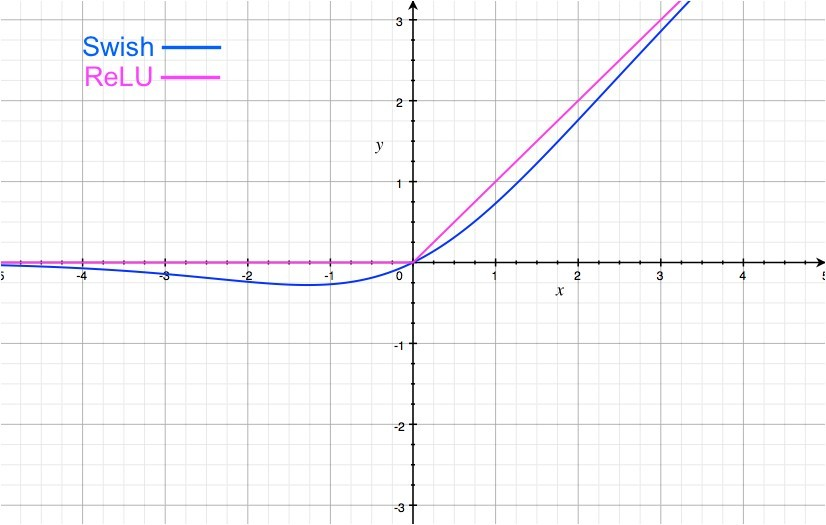

In [3]:
# ------------------------------------------------------------
# needs to be defined as activation class otherwise error
# AttributeError: 'Activation' object has no attribute '__name__'    
class Swish(Activation):
    
    def __init__(self, activation, **kwargs):
        super(Swish, self).__init__(activation, **kwargs)
        self.__name__ = 'swish'

# custom activation
from keras.backend import sigmoid
def swish(x, beta = 1.52):
    return (x * sigmoid(beta * x))
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Swish(swish)})

In [4]:
# Weight Constraints
norm = max_norm(2.7)

# Our first model is a Multilayer Perceptrons (MLP) neural network
***With our first approach to the neural network:***

We start by having 4 dense layer with 1 input layer and 2 hiden layer with drop out for regularization and an output layer. This neural network work ok but it's very resouces intensive and also not very generalize even with large drop out rate

In [5]:

def nn_model1():
    model = Sequential()
    model.add(Dense(256, input_shape=(16, 16, 1)))
    model.add(Flatten())
    model.add(Dense(512, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.4))
    model.add(Dense(10,activation='softmax',kernel_initializer='uniform'))
    model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

# From our second model to the the sixth model are Convolution Neural Network (CNN) 

All of the are generated by the mode_gennerator.ipynb we pick the 5 best model form the model generator. 

CNN is realy beneficial for image classification as convolution layer extract complex patent and features, while the max pooling layers reduce the size of the image but retain most of the detail and enhance it, they event create complex patterns which also improve classification tasks. Therefore, CNN will give better result than MLP plus CNN layers do alot of heavy-lifting that singnificantly reduce the time it's take for each epoch. This enable us to do many experiment and parameter tuning 

In [60]:

def nn_model2():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), 
                 input_shape=(16, 16, 1) ,kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(Conv2D(32, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax',kernel_initializer='uniform'))
    adam = Adam(learning_rate=0.00092, amsgrad=True)
    model.compile( optimizer = adam, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [61]:
def nn_model3():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), 
                 input_shape=(16, 16, 1) ,kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(32, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(512, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.4))
    model.add(Dense(10,activation='softmax',kernel_initializer='uniform'))
    adam = Adam(learning_rate=0.00092, amsgrad=True)
    model.compile( optimizer = adam, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [62]:
def nn_model4():
    model = Sequential()
    model.add(Conv2D(16, (3, 3),
                 input_shape=(16, 16, 1) ,kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(32, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(Conv2D(32, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(512, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.4))
    model.add(Dense(10,activation='softmax',kernel_initializer='uniform'))
    adam = Adam(learning_rate=0.00092, amsgrad=True)
    model.compile( optimizer = adam, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [63]:
def nn_model5():
    model = Sequential()
    model.add(Conv2D(32, (3, 3),
                 input_shape=(16, 16, 1) ,kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(Conv2D(64, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(Conv2D(128, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax',kernel_initializer='uniform'))
    adam = Adam(learning_rate=0.00092, amsgrad=True)
    model.compile( optimizer = adam, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [64]:
def nn_model6():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), 
                 input_shape=(16, 16, 1) ,kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(Conv2D(64, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(Conv2D(64, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(Conv2D(128, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(Conv2D(128, (3, 3),  padding='same',kernel_constraint=norm, bias_constraint=norm))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='swish' ,kernel_initializer="glorot_normal"))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax',kernel_initializer='uniform'))
    adam = Adam(learning_rate=0.00092, amsgrad=True)
    model.compile( optimizer = adam, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

# Data Preprocess
Because the data is normally distributed through out the 10 digits, with no nal values, plus the data is from 0 to 1 not 0 to 255 like a normal image there for we wouldn't do much data pre-processing


In [6]:
# This will transform 10 columns of the original data to 1 column which will make the trainning the model faster as we reduce 9 columns
def label_transform(df):
    ls= df.values
    label=0
    for i in ls:
        if i==1:
            break
        elif i==0:
            label+=1
        else:
            print("wrong format")
    return label

In [7]:
# here is we reshape the trainning data to a 16 by 16 matrix that can be use to output a image like below and also feed it in to our CNN
def data_transform(df):
    vl = df.values
    data = np.array( vl.reshape((16,16)))
    return data

label of the image: 6


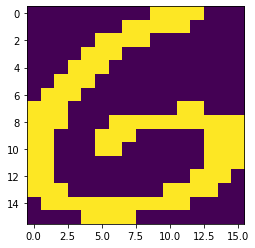

In [8]:
# checking the label is correct and output a image
data_label = data.iloc[:,256:266]
img_index = 128# <<<<<  You can update this value to look at other images
img = data.loc[img_index].drop(data_label.columns).values
print("label of the image:", label_transform(data_label.loc[img_index]))
plt.imshow(img.reshape((16,16)))

In [9]:
# Implement our preprocess to the data

label_list = []
data_list = []
for i in range(len(data_label.index)):
    label = label_transform(data_label.loc[i])
    label_list.append(label)
for u in range(len(data.index)):
    data_i = data_transform(data.loc[u].drop(data_label.columns))
    data_list.append(data_i)
# data_list=data.drop(data_label.columns,axis=1).values
data_list = np.array(data_list)
label_list = np.array(label_list)

In [69]:
# Add another dimension in to the trainning data as it's a requierment for keras 
# and because we are not trainning with color image so we just add number 1 for a color image you need to add a 3 instead
data_list=  data_list.reshape(data_list.shape[0], 16, 16,1)

In [79]:
# Splitting the data so we can have 20% data to test our model performance
X_train, X_test, y_train, y_test = train_test_split(data_list,label_list, test_size=0.2)

# Trainning our Neural Network model

In [80]:
# Initialize our model
model1 = nn_model1()
model2 = nn_model2()
model3 = nn_model3()
model4 = nn_model4()
model5 = nn_model5()
model6 = nn_model6()

In [81]:
# Get a recap of our model
model1.summary()
model2.summary()
model3.summary()
model4.summary()
model5.summary()
model6.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 16, 16, 256)       512       
_________________________________________________________________
flatten_25 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               33554944  
_________________________________________________________________
dropout_93 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_94 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 10)              





------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
***Model Checkpoint:*** output the best weight of the model through out the trainning so we can load the epoch that have the lowest validation loss

***EarlyStopping:*** this will stop our model from trainning when our validation loss start to go up, this not only stop the model from overfitting but also alow the model to train to it's full protential


In [82]:
checkpointer1 = ModelCheckpoint(filepath="data/best_epochm1.hdf5", monitor = 'val_accuracy', verbose=0,save_best_only=True)
checkpointer2 = ModelCheckpoint(filepath="data/best_epochm2.hdf5", monitor = 'val_accuracy', verbose=0,save_best_only=True)
checkpointer3 = ModelCheckpoint(filepath="data/best_epochm3.hdf5", monitor = 'val_accuracy', verbose=0,save_best_only=True)
checkpointer4 = ModelCheckpoint(filepath="data/best_epochm4.hdf5", monitor = 'val_accuracy', verbose=0,save_best_only=True)
checkpointer5 = ModelCheckpoint(filepath="data/best_epochm5.hdf5", monitor = 'val_accuracy', verbose=0,save_best_only=True)
checkpointer6 = ModelCheckpoint(filepath="data/best_epochm6.hdf5", monitor = 'val_accuracy', verbose=0,save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1, mode='auto')

In [83]:
# # we train the model and save it into history so that we can retrain, see it's mectric and so on
history1 = model1.fit(X_train, y_train, epochs = 500, validation_split = 0.2,shuffle = True, verbose=0,batch_size=4096, callbacks = [earlystopper,checkpointer1])
history2 = model2.fit(X_train, y_train, epochs = 500, validation_split = 0.2,shuffle = True, verbose=0,batch_size=4096, callbacks = [earlystopper,checkpointer2])
history3 = model3.fit(X_train, y_train, epochs = 500, validation_split = 0.2,shuffle = True, verbose=0,batch_size=4096, callbacks = [earlystopper,checkpointer3])
history4 = model4.fit(X_train, y_train, epochs = 500, validation_split = 0.2,shuffle = True, verbose=0,batch_size=4096, callbacks = [earlystopper,checkpointer4])
history5 = model5.fit(X_train, y_train, epochs = 500, validation_split = 0.2,shuffle = True, verbose=0,batch_size=4096, callbacks = [earlystopper,checkpointer5])
history6 = model6.fit(X_train, y_train, epochs = 500, validation_split = 0.2,shuffle = True, verbose=0,batch_size=4096, callbacks = [earlystopper,checkpointer6])

Epoch 00046: early stopping
Epoch 00184: early stopping
Epoch 00200: early stopping
Epoch 00145: early stopping
Epoch 00167: early stopping
Epoch 00133: early stopping


# Post Neural Network trainning

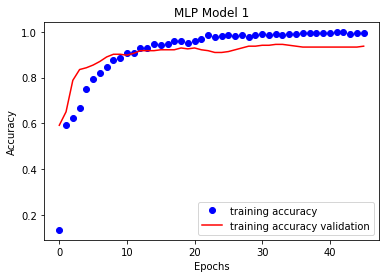

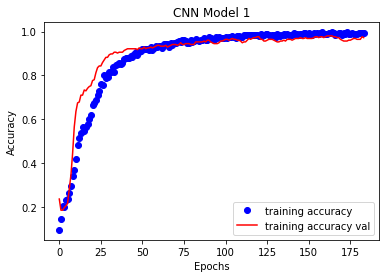

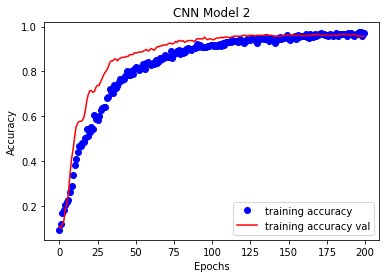

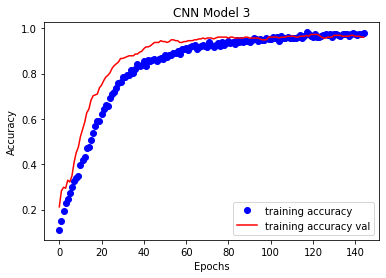

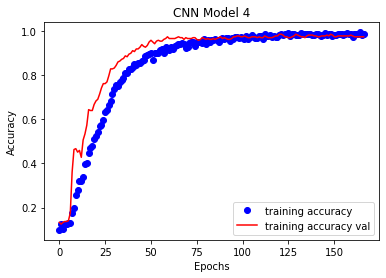

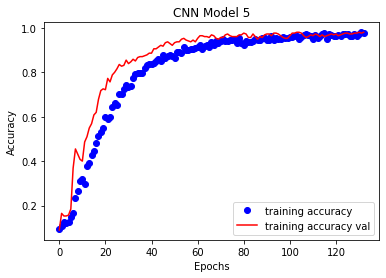

In [84]:
# Plots the tranning and validation acuracy over each epoch 
history_dict=history1.history
acc_values = history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(acc_values,'bo',label='training accuracy')
plt.plot(val_acc_values,'r',label='training accuracy validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Model 1')
plt.show()
# Plots the tranning and validation acuracy over each epoch 
history_dict=history2.history
acc_values = history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(acc_values,'bo',label='training accuracy')
plt.plot(val_acc_values,'r',label='training accuracy val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model 1')
plt.show()
# Plots the tranning and validation acuracy over each epoch 
history_dict=history3.history
acc_values = history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(acc_values,'bo',label='training accuracy')
plt.plot(val_acc_values,'r',label='training accuracy val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model 2')
plt.show()
# Plots the tranning and validation acuracy over each epoch 
history_dict=history4.history
acc_values = history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(acc_values,'bo',label='training accuracy')
plt.plot(val_acc_values,'r',label='training accuracy val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model 3')
plt.show()
# Plots the tranning and validation acuracy over each epoch 
history_dict=history5.history
acc_values = history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(acc_values,'bo',label='training accuracy')
plt.plot(val_acc_values,'r',label='training accuracy val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model 4')
plt.show()
# Plots the tranning and validation acuracy over each epoch 
history_dict=history6.history
acc_values = history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(acc_values,'bo',label='training accuracy')
plt.plot(val_acc_values,'r',label='training accuracy val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model 5')
plt.show()

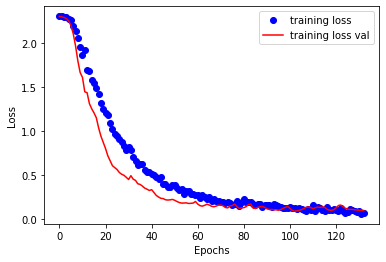

In [85]:
# Plots the tranning and validation loss over each epoch
history_dict=history6.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [86]:
# we load our best weight from our model
load_best_w_epochm1 = model1.load_weights('data/best_epochm1.hdf5')
load_best_w_epochm2 = model2.load_weights('data/best_epochm2.hdf5')
load_best_w_epochm3 = model3.load_weights('data/best_epochm3.hdf5')
load_best_w_epochm4 = model4.load_weights('data/best_epochm4.hdf5')
load_best_w_epochm5 = model5.load_weights('data/best_epochm5.hdf5')
load_best_w_epochm6 = model6.load_weights('data/best_epochm6.hdf5')

In [87]:
# here is just a quick evaluation for our model on our the test data
# these result may change a
test_loss, test_acc = model1.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy model 1:', test_acc)
test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy model 2:', test_acc)
test_loss, test_acc = model3.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy model 3:', test_acc)
test_loss, test_acc = model4.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy model 4:', test_acc)
test_loss, test_acc = model5.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy model 5:', test_acc)
test_loss, test_acc = model6.evaluate(X_test,  y_test, verbose=2)
print('Test accuracy model 6:', test_acc)

Test accuracy model 1: 0.9016300845146179
Test accuracy model 2: 0.9498432874679565
Test accuracy model 3: 0.9373040795326233
Test accuracy model 4: 0.9498432874679565
Test accuracy model 5: 0.9717868338581871
Test accuracy model 6: 0.9755172228813171


In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[30  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1]
 [ 0  1 28  0  0  0  0  0  0]
 [ 0  0  0 24  0  1  0  0  0]
 [ 1  0  2  0 25  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0 31  0]
 [ 0  0  1  0  0  0  0  2 27]]


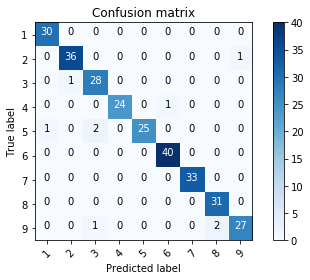

In [89]:
# create a confusion metric so that we can see where our model did wrong in the test data
y_pred = model6.predict(X_test)
y_pred_result=[]
from sklearn.metrics import confusion_matrix
for i in range(len(y_pred)):
    result = np.argmax(y_pred[i])
    y_pred_result.append(result)
confusion_matrix(y_test, y_pred_result, labels=[1, 2, 3,4,5,6,7,8,9])
cnf_matrix = confusion_matrix(y_test, y_pred_result,labels=[1, 2, 3,4,5,6,7,8,9])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1', '2', '3','4','5','6','7','8','9'],
                      title='Confusion matrix')

In [90]:
# create a confusion metric so that we can see where our model did wrong in the whole data set
y_pred_dataset = model6.predict(data_list)

y_pred_result_dataset=[]

for i in range(len(y_pred_dataset)):
    result_data = np.argmax(y_pred_dataset[i])
    y_pred_result_dataset.append(result_data)

In [91]:
# here is a clear look at all of the metric of our model on the test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_result))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.97      1.00      0.98        30
           2       0.97      0.97      0.97        37
           3       0.90      0.97      0.93        29
           4       0.96      0.96      0.96        25
           5       1.00      0.92      0.96        28
           6       0.98      0.98      0.98        41
           7       1.00      1.00      1.00        33
           8       0.94      1.00      0.97        31
           9       0.96      0.90      0.93        30

    accuracy                           0.98       319
   macro avg       0.97      0.98      0.98       319
weighted avg       0.97      0.98      0.98       319



In [92]:
# here is a clear look at all of the metric of our model on the whole data set
from sklearn.metrics import classification_report
print(classification_report(label_list, y_pred_result_dataset))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.98      1.00      0.99       162
           2       0.99      0.99      0.99       159
           3       0.98      0.99      0.98       159
           4       0.99      0.98      0.99       161
           5       0.99      0.97      0.98       159
           6       0.99      0.99      0.99       161
           7       1.00      1.00      1.00       158
           8       0.97      1.00      0.98       155
           9       0.99      0.97      0.98       158

    accuracy                           0.99      1592
   macro avg       0.99      0.99      0.99      1592
weighted avg       0.99      0.99      0.99      1592



# Visualize what our CNN is doing in each layer
Pls don't run this part of the code for the MLP model this is only for the CNN models, you just need to change the model and the depth number of the model to visualize the model layer

In [95]:
# pls keep in mind that you need to change num_layers for each model
num_layers = 12
layer_outputs = [layer.output for layer in model6.layers[:11]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model6.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [96]:
activations = activation_model.predict(X_train) # Returns a list of five Numpy arrays: one array per layer activation

In [97]:
first_layer = activations[0]
print(first_layer.shape)

(1273, 14, 14, 32)


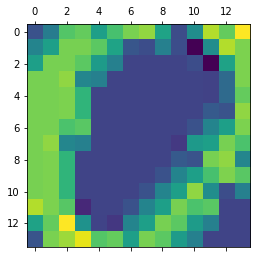

In [98]:
# here is just to show an image from the first layer
plt.matshow(first_layer[0, :, :, 4], cmap='viridis')

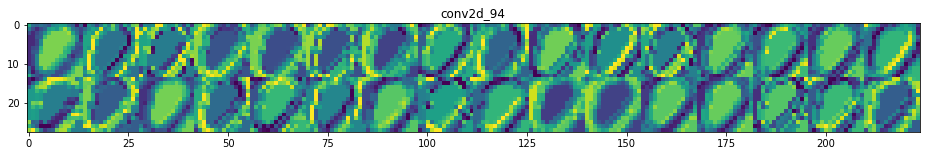

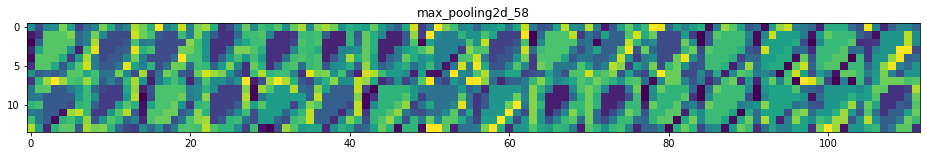

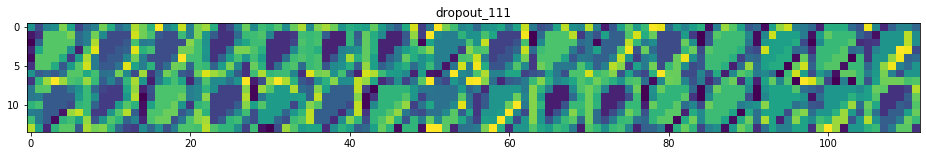

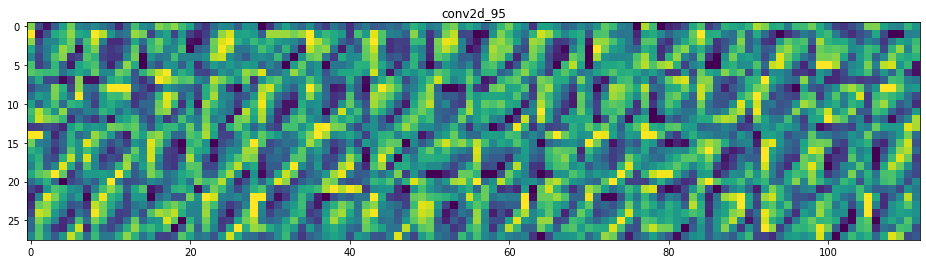

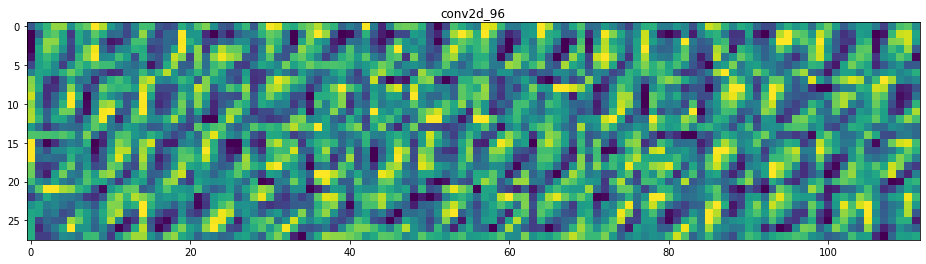

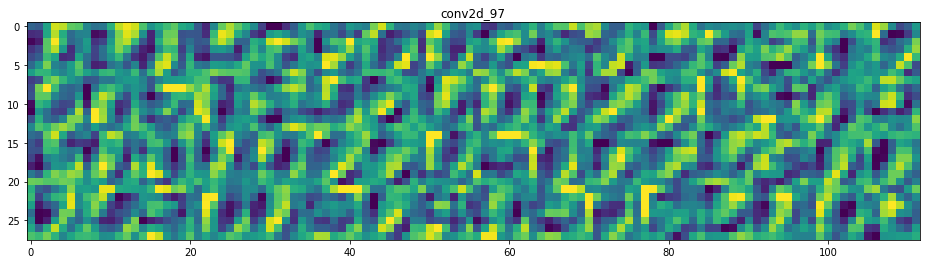

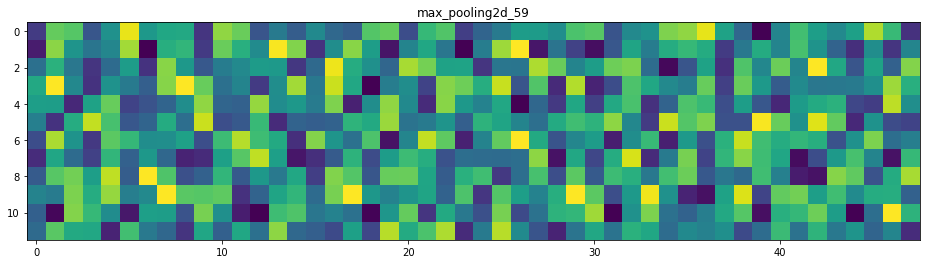

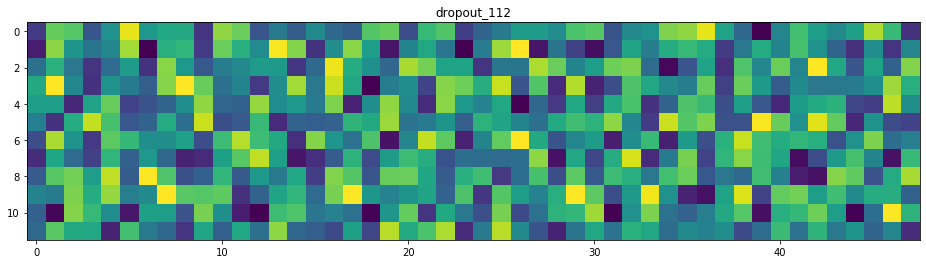

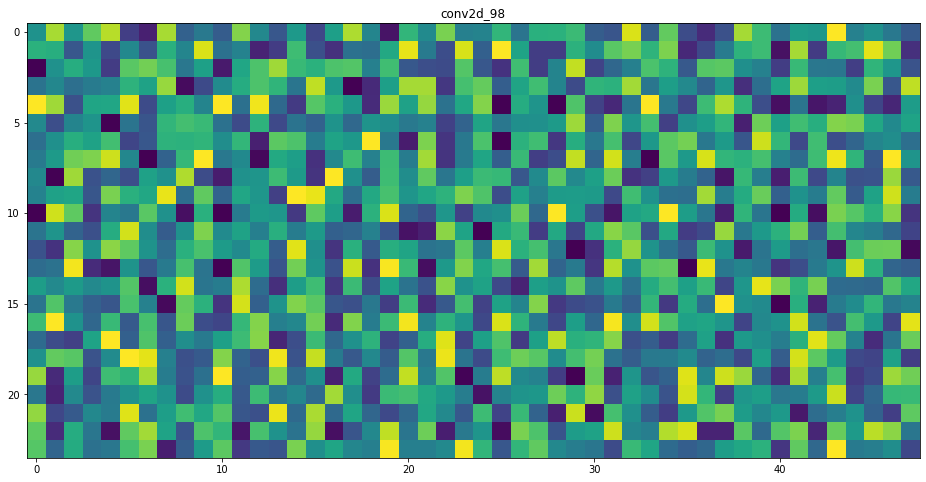

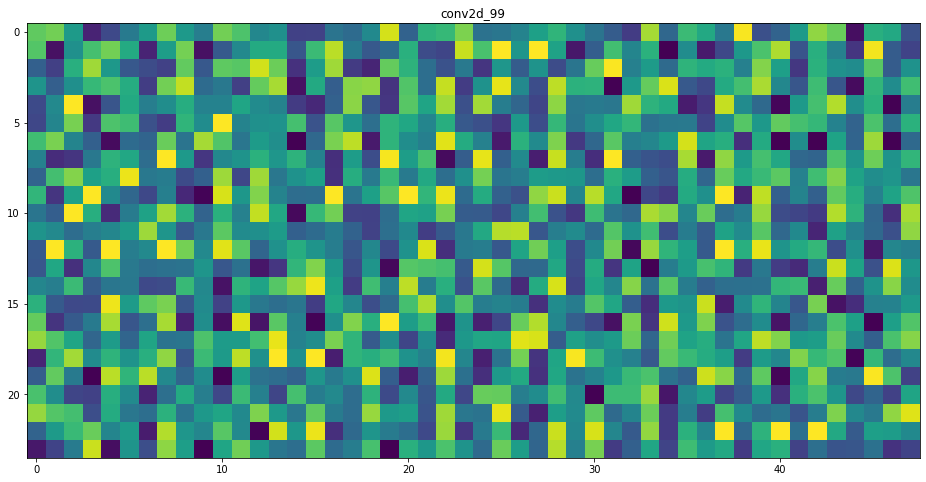

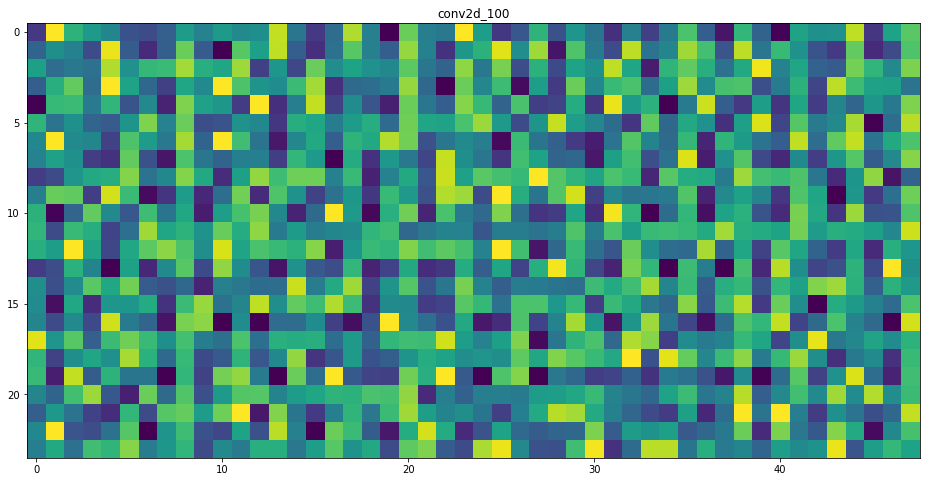

In [99]:
# Visualize what our CNN is doing in each layer
layer_names = []
for layer in model6.layers[:11]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Two Non Neural Network classifier model
***- Random Forest Classifier***

***- Support-Vector Machine Classifier***

# Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier 
data_labelnonnn = data.iloc[:,256:266]
label_listnonnn = []
data_listnonnn = data.iloc[:,0:256]
for i in range(len(data_label.index)):
    label = label_transform(data_label.loc[i])
    label_listnonnn.append(label)

label_list = np.array(label_list)

X_train, X_test, y_train, y_test = train_test_split(data_listnonnn,label_listnonnn, test_size=0.2)

In [14]:
X_train

,0.0000,0.0000.1,0.0000.2,0.0000.3,0.0000.4,0.0000.5,1.0000,1.0000.1,1.0000.2,1.0000.3,...,1.0000.123,0.0000.123,0.0000.124,0.0000.125,0.0000.126,0.0000.127,0.0000.128,0.0000.129,0.0000.130,0.0000.131
490,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
810,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
# RandomizedSearchCV this a cross validation method
from pprint import pprint
rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 330, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': [True, False],
 'max_depth': [10, 42, 74, 106, 138, 170, 202, 234, 266, 298, 330, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [2, 5, 10, 20],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [102]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

rf_random.fit(X_train,y_train)   

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [103]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 266,
 'bootstrap': False}

In [104]:
# GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [ 330, 340,350,360,370],
    'max_features': ['auto'],
    'min_samples_leaf': [ 1,3,5],
    'min_samples_split': [1,2,3,4],
    'n_estimators': [2000,2010,2020,2030,2040]
}

In [105]:
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train,y_train)  

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 20.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [106]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 330,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [107]:
# Create the parameter grid based on the results we get from the first grid search
param_grid = {
    'bootstrap': [False],
    'max_depth': [ 330, 320,331,332,333],
    'max_features': ['auto'],
    'min_samples_leaf': [ 1],
    'min_samples_split': [2],
    'n_estimators': [2016,2018,2019,2020,2017,2021,2022,2023]
}

In [108]:
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train,y_train)  

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [109]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 330,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2021}

In [110]:
rf = RandomForestClassifier(bootstrap=False,max_depth=330,random_state = 42,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=2021)

In [111]:
rf.fit(X_train,y_train) 
y_pred_non=rf.predict(X_test)

Confusion matrix, without normalization
[[27  0  0  0  1  0  0  0  0]
 [ 0 19  0  0  0  0  0  1  0]
 [ 0  0 28  0  0  0  0  0  1]
 [ 0  0  0 43  0  1  0  0  0]
 [ 0  0  0  0 31  0  0  0  1]
 [ 0  0  0  0  0 33  0  0  0]
 [ 2  0  0  0  0  0 31  0  0]
 [ 0  0  1  0  0  0  0 26  0]
 [ 1  0  2  0  0  0  1  0 34]]


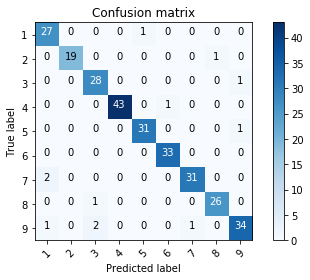

In [112]:
from sklearn.metrics import confusion_matrix
for i in range(len(y_pred)):
    result = np.argmax(y_pred[i])
    y_pred_result.append(result)
confusion_matrix(y_test, y_pred_non, labels=[1, 2, 3,4,5,6,7,8,9])
cnf_matrix = confusion_matrix(y_test, y_pred_non,labels=[1, 2, 3,4,5,6,7,8,9])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1', '2', '3','4','5','6','7','8','9'],
                      title='Confusion matrix')

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_non))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.90      0.96      0.93        28
           2       1.00      0.95      0.97        20
           3       0.90      0.97      0.93        29
           4       1.00      0.98      0.99        44
           5       0.97      0.97      0.97        32
           6       0.97      1.00      0.99        33
           7       0.97      0.94      0.95        33
           8       0.96      0.96      0.96        27
           9       0.94      0.89      0.92        38

    accuracy                           0.96       319
   macro avg       0.96      0.96      0.96       319
weighted avg       0.96      0.96      0.96       319



# Support-Vector Machine classifier

In [114]:
from sklearn import svm

In [115]:
# After playing with the parameter with SVC I see only some minor improvement with this data so I settle on this paramenter 
# unlike the Random Forest Classifier model which improve alot after parameter tunning
svc = svm.SVC(kernel='rbf',random_state=42,degree=8,probability=True)
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [116]:
y_svc_pred = svc.predict(X_test)

Confusion matrix, without normalization
[[27  1  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  1]
 [ 0  0  0 43  0  0  1  0  0]
 [ 1  0  0  0 31  0  0  0  0]
 [ 0  0  0  0  1 32  0  0  0]
 [ 1  0  0  0  0  0 32  0  0]
 [ 0  0  1  0  0  0  0 26  0]
 [ 1  0  2  0  0  0  0  0 35]]


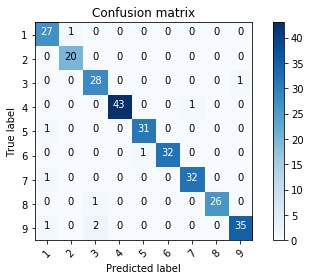

In [117]:
from sklearn.metrics import confusion_matrix
for i in range(len(y_pred)):
    result = np.argmax(y_pred[i])
    y_pred_result.append(result)
confusion_matrix(y_test, y_svc_pred, labels=[1, 2, 3,4,5,6,7,8,9])
cnf_matrix = confusion_matrix(y_test, y_svc_pred,labels=[1, 2, 3,4,5,6,7,8,9])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1', '2', '3','4','5','6','7','8','9'],
                      title='Confusion matrix')

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.90      0.96      0.93        28
           2       0.91      1.00      0.95        20
           3       0.90      0.97      0.93        29
           4       1.00      0.98      0.99        44
           5       0.97      0.97      0.97        32
           6       1.00      0.97      0.98        33
           7       0.97      0.97      0.97        33
           8       1.00      0.96      0.98        27
           9       0.97      0.92      0.95        38

    accuracy                           0.97       319
   macro avg       0.96      0.97      0.96       319
weighted avg       0.97      0.97      0.97       319



# Ultimate Judgement
We import our digits files by using opencv cv2 and shuffle them

In [231]:
import os
import cv2
import random
DIR = 'data/jugmentdata/'
catos = ['0','1','2','3','4','5','6','7','8','9']
img_list_in_num =[]
for cato in catos:
    path = os.path.join(DIR,cato)
    for img in os.listdir(path):
        num = int(cato)
        img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_list_in_num.append(np.array([img_array,cato]))

random.shuffle(img_list_in_num)



X_jud = []
y_jud = []

for img_jud, label in img_list_in_num:
    X_jud.append(img_jud)
    y_jud.append(label)

In [232]:
y_jud= np.array(y_jud)
y_jud = [int(i) for i in y_jud] 

In [233]:
X_jud =  np.array(X_jud) /255.0

In [234]:
X_jud = X_jud.reshape(X_jud.shape[0],256)

---------------------------------------------------------------------------------------------------------------------------------------
***Random Forest Classifier Judgement*** 

In [235]:
y_rf_pred_jud = rf.predict(X_jud)

In [236]:
from sklearn.metrics import classification_report
print(classification_report(y_jud,y_rf_pred_jud))

              precision    recall  f1-score   support

           0       1.00      0.24      0.38        21
           1       0.49      0.95      0.65        21
           2       0.46      0.62      0.53        21
           3       0.90      0.43      0.58        21
           4       0.78      0.67      0.72        21
           5       0.58      0.67      0.62        21
           6       1.00      0.43      0.60        21
           7       0.48      0.95      0.63        21
           8       0.62      0.38      0.47        21
           9       0.65      0.62      0.63        21

    accuracy                           0.60       210
   macro avg       0.70      0.60      0.58       210
weighted avg       0.70      0.60      0.58       210



In [237]:
rf.fit(data_listnonnn,label_listnonnn)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=330, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2021,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [238]:
y_rf_pred_jud = rf.predict(X_jud)

In [239]:
from sklearn.metrics import classification_report
print(classification_report(y_jud,y_rf_pred_jud))

              precision    recall  f1-score   support

           0       1.00      0.24      0.38        21
           1       0.49      0.95      0.65        21
           2       0.46      0.62      0.53        21
           3       0.90      0.43      0.58        21
           4       0.78      0.67      0.72        21
           5       0.58      0.67      0.62        21
           6       1.00      0.43      0.60        21
           7       0.48      0.95      0.63        21
           8       0.62      0.38      0.47        21
           9       0.65      0.62      0.63        21

    accuracy                           0.60       210
   macro avg       0.70      0.60      0.58       210
weighted avg       0.70      0.60      0.58       210



-------------------------------------------------------------------------------------------------------------------------------------
***Support Vector Machine Classifier***

In [240]:
y_svc_pred_jud = svc.predict(X_jud)

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_jud,y_svc_pred_jud))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.50      1.00      0.67        21
           2       0.88      0.71      0.79        21
           3       0.93      0.62      0.74        21
           4       0.57      0.81      0.67        21
           5       0.62      0.71      0.67        21
           6       0.92      0.57      0.71        21
           7       0.79      0.90      0.84        21
           8       0.84      0.76      0.80        21
           9       0.75      0.71      0.73        21

    accuracy                           0.71       210
   macro avg       0.78      0.71      0.71       210
weighted avg       0.78      0.71      0.71       210



In [242]:
svc.fit(data_listnonnn,label_listnonnn)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [243]:
y_svc_pred_jud = svc.predict(X_jud)

In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_jud,y_svc_pred_jud))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.50      1.00      0.67        21
           2       0.88      0.71      0.79        21
           3       0.93      0.62      0.74        21
           4       0.57      0.81      0.67        21
           5       0.62      0.71      0.67        21
           6       0.92      0.57      0.71        21
           7       0.79      0.90      0.84        21
           8       0.84      0.76      0.80        21
           9       0.75      0.71      0.73        21

    accuracy                           0.71       210
   macro avg       0.78      0.71      0.71       210
weighted avg       0.78      0.71      0.71       210



***All the neural network***

In [245]:
X_jud=  X_jud.reshape(X_jud.shape[0], 16, 16,1)

In [246]:
y_jud_predict_nn1 = model1.predict(X_jud)
y_jud_predict_nn2 = model2.predict(X_jud)
y_jud_predict_nn3 = model3.predict(X_jud)
y_jud_predict_nn4 = model4.predict(X_jud)
y_jud_predict_nn5 = model5.predict(X_jud)
y_jud_predict_nn6 = model6.predict(X_jud)

In [248]:
y_jud_predict_nn_result1=[]
y_jud_predict_nn_result2=[]
y_jud_predict_nn_result3=[]
y_jud_predict_nn_result4=[]
y_jud_predict_nn_result5=[]
y_jud_predict_nn_result6=[]
for i in range(len(y_jud_predict_nn2)):
    result_data1 = np.argmax(y_jud_predict_nn1[i])
    y_jud_predict_nn_result1.append(result_data1)
    result_data2 = np.argmax(y_jud_predict_nn2[i])
    y_jud_predict_nn_result2.append(result_data2)
    result_data3 = np.argmax(y_jud_predict_nn3[i])
    y_jud_predict_nn_result3.append(result_data3)
    result_data4 = np.argmax(y_jud_predict_nn4[i])
    y_jud_predict_nn_result4.append(result_data4)
    result_data5 = np.argmax(y_jud_predict_nn5[i])
    y_jud_predict_nn_result5.append(result_data5)
    result_data6 = np.argmax(y_jud_predict_nn6[i])
    y_jud_predict_nn_result6.append(result_data6)

In [249]:
print(classification_report(y_jud,y_jud_predict_nn_result1))
print(classification_report(y_jud,y_jud_predict_nn_result2))
print(classification_report(y_jud,y_jud_predict_nn_result3))
print(classification_report(y_jud,y_jud_predict_nn_result4))
print(classification_report(y_jud,y_jud_predict_nn_result5))
print(classification_report(y_jud,y_jud_predict_nn_result6))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        21
           1       0.55      1.00      0.71        21
           2       0.73      0.76      0.74        21
           3       0.89      0.76      0.82        21
           4       0.53      0.48      0.50        21
           5       0.85      0.52      0.65        21
           6       1.00      0.62      0.76        21
           7       0.59      0.90      0.72        21
           8       0.50      0.81      0.62        21
           9       0.89      0.38      0.53        21

    accuracy                           0.68       210
   macro avg       0.75      0.68      0.68       210
weighted avg       0.75      0.68      0.68       210

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      1.00      0.98        21
           2       0.82      0.86      0.84        21
           3       0.82 

In [251]:
# Evaluation for the judgement data for all the neural network
test_loss, test_acc = model1.evaluate(X_jud,  y_jud, verbose=2)
print('Judgment accuracy model MLP:', test_acc)
test_loss, test_acc = model2.evaluate(X_jud,  y_jud, verbose=2)
print('Judgment accuracy model CNN 1 :', test_acc)
test_loss, test_acc = model3.evaluate(X_jud,  y_jud, verbose=2)
print('Judgment accuracy model CNN 2:', test_acc)
test_loss, test_acc = model4.evaluate(X_jud,  y_jud, verbose=2)
print('Judgment accuracy model CNN 3:', test_acc)
test_loss, test_acc = model5.evaluate(X_jud,  y_jud, verbose=2)
print('Judgment accuracy model CNN 4:', test_acc)
test_loss, test_acc = model6.evaluate(X_jud,  y_jud, verbose=2)
print('Judgment accuracy model CNN 5:', test_acc)

Judgment accuracy model MLP: 0.6809523701667786
Judgment accuracy model CNN 1 : 0.8857142925262451
Judgment accuracy model CNN 2: 0.8952381014823914
Judgment accuracy model CNN 3: 0.8904761672019958
Judgment accuracy model CNN 4: 0.8952381014823914
Judgment accuracy model CNN 5: 0.9095237851142883
